In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from datetime import date
import seaborn as sns

In [6]:
# read in files
covid = pd.read_csv('weekly_covid_county_level_US.csv')
temp = pd.read_csv('weekly_tavg_county_cont_US.csv')

# create joined data frame
joined_df = pd.merge(
    left= covid,
    right= temp,
    how='left',
    left_on= ['county_name','state_abbr','report_date'], 
    right_on= ["County",'State','Week'])

joined_df['Week'] = pd.to_datetime(joined_df['Week'])

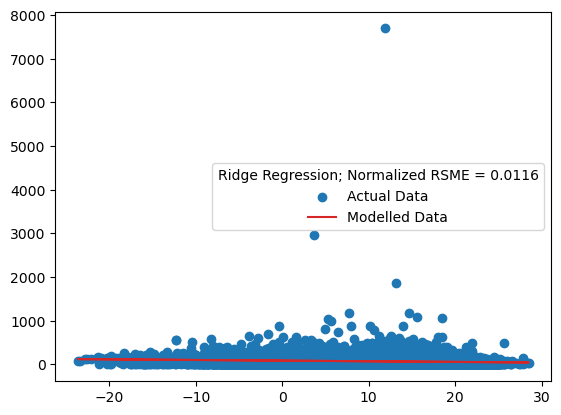

In [7]:
## single input variables
## pre processing
joined_df['TempChange'] = joined_df['Temperature'].diff()
joined_df['Year'] = joined_df['Week'].dt.year
joined_df['Month'] = joined_df['Week'].dt.month
joined_df['Day'] = joined_df['Week'].dt.day
joined_df = joined_df.dropna()

#X_data = joined_df[['fips_code','Temperature', 'Year', 'Month', 'Day']].values
#X_data = joined_df[['Temperature']].values
X_data = joined_df[['Temperature']]
y_data = joined_df['cases_per_100K_7_day_count_change'].values
y_data = y_data.reshape(-1,1)

# split data into training set and testing set
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# scale variables
Xscaler = StandardScaler()
Xscaler.fit(X_train)
X_train_scaled = Xscaler.transform(X_train)

yscaler = StandardScaler()
yscaler.fit(y_train)
y_train_scaled = yscaler.transform(y_train)

# fit linear regression
linear_reg = Ridge(alpha=0.1)
linear_reg.fit(X_train_scaled, y_train_scaled)

X_test_scaled = Xscaler.transform(X_test)
y_pred_scaled = linear_reg.predict(X_test_scaled)
y_pred = yscaler.inverse_transform(y_pred_scaled.reshape(-1,1))

# normalized root mean square error
rmse = np.sqrt(np.mean((y_test-y_pred)**2)) / (max(y_data) - min(y_data)).item()

# plt.scatter(y_test, y_pred, color = 'tab:blue', label= 'Actual Data')
plt.scatter(X_test, y_test, color = 'tab:blue', label= 'Actual Data')
plt.plot(X_test, y_pred, color = 'tab:red', label= 'Modelled Data')
plt.legend(title="Ridge Regression; Normalized RSME = {:.4f}".format(rmse))

In [8]:
## multiple input variables 

## pre processing
joined_df['TempChange'] = joined_df['Temperature'].diff()
joined_df['Year'] = joined_df['Week'].dt.year
joined_df['Month'] = joined_df['Week'].dt.month
joined_df['Day'] = joined_df['Week'].dt.day
joined_df = joined_df.dropna()

X_data = joined_df[['fips_code','Temperature', 'Year', 'Month', 'Day']].values
#X_data = joined_df[['Temperature']].values
#X_data = joined_df[['TempChange']]
y_data = joined_df['cases_per_100K_7_day_count_change'].values
y_data = y_data.reshape(-1,1)

# split data
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

Xscaler = StandardScaler()
Xscaler.fit(X_train)
X_train_scaled = Xscaler.transform(X_train)

yscaler = StandardScaler()
yscaler.fit(y_train)
y_train_scaled = yscaler.transform(y_train)

linear_reg = Ridge(alpha=0.1)
linear_reg.fit(X_train_scaled, y_train_scaled)

X_test_scaled = Xscaler.transform(X_test)
y_pred_scaled = linear_reg.predict(X_test_scaled)
y_pred = yscaler.inverse_transform(y_pred_scaled.reshape(-1,1))

# normalized root mean square error
rmse = np.sqrt(np.mean((y_test-y_pred)**2)) / (max(y_data) - min(y_data)).item()

print(rmse)
# plt.scatter(y_test, y_pred, color = 'tab:blue', label= 'Actual Data')
# plt.scatter(X_test, y_test, color = 'tab:blue', label= 'Actual Data')
# plt.plot(X_test, y_pred, color = 'tab:red', label= 'Modelled Data')
# plt.legend(title="Ridge Regression; RSME = {:.4f}".format(rmse))

0.009091152143635607
